In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime as dt
import matplotlib.pyplot as fig
import seaborn as sns
import bar_chart_race as bcr
import time

In [9]:
tickers = ["BBDC4.SA","BBAS3.SA", "ITUB4.SA", "SANB4.SA", "BIDI11.SA"] #"^BVSP"
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = "2021") ['Adj Close']  #Adj Close é a coluna
print (mydata.head().round(2))
print (mydata.tail().round(2))

            BBDC4.SA  BBAS3.SA  ITUB4.SA  SANB4.SA  BIDI11.SA
Date                                                         
2021-01-04     20.75     33.72     29.69     20.88      32.41
2021-01-05     20.63     33.37     29.49     20.36      31.52
2021-01-06     21.31     34.14     30.36     21.09      31.40
2021-01-07     21.87     35.49     31.54     21.73      32.79
2021-01-08     21.69     35.70     31.53     21.60      39.14
            BBDC4.SA  BBAS3.SA  ITUB4.SA  SANB4.SA  BIDI11.SA
Date                                                         
2022-06-07     19.76     35.51     25.56     16.71      11.30
2022-06-08     19.41     35.19     25.07     16.57      11.10
2022-06-09     19.40     35.14     24.64     16.50      11.06
2022-06-10     19.11     34.55     24.10     16.47      10.30
2022-06-13     18.81     33.60     23.69     16.01       9.77


In [3]:
colocando_em_ordem = sorted(mydata["BBDC4.SA"].head(5))
colocando_em_ordem

[20.62557601928711,
 20.752099990844727,
 21.309171676635742,
 21.686323165893555,
 21.874897003173828]

In [4]:
correlacao = mydata.corr()
correlacao

# 0.215357 BBDC4 BBAS3
# 0.196390 BBAS3 ITUB4
# 0.817275 BBDC4 ITUB4

,BBDC4.SA,BBAS3.SA,ITUB4.SA,SANB4.SA,BIDI11.SA
BBDC4.SA,1.000000,0.149968,0.818611,0.788111,0.539521
BBAS3.SA,0.149968,1.000000,0.087035,0.021448,-0.628301
ITUB4.SA,0.818611,0.087035,1.000000,0.878302,0.578863
SANB4.SA,0.788111,0.021448,0.878302,1.000000,0.540564
BIDI11.SA,0.539521,-0.628301,0.578863,0.540564,1.000000


In [5]:
mydata = mydata["BBDC4.SA"].rolling(252).corr(mydata["ITUB4.SA"])
mydata

Date
2021-01-04         NaN
2021-01-05         NaN
2021-01-06         NaN
2021-01-07         NaN
2021-01-08         NaN
                ...   
2022-06-07    0.826856
2022-06-08    0.824639
2022-06-09    0.821243
2022-06-10    0.818024
2022-06-13    0.814018
Length: 359, dtype: float64

<AxesSubplot:xlabel='Date'>

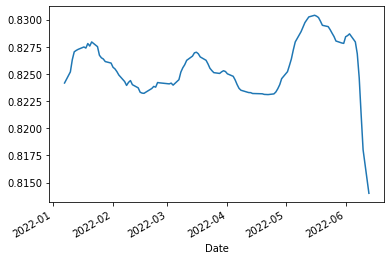

In [6]:
mydata = mydata.dropna()
mydata.plot()

In [7]:
mydata.iloc[1].round(2)

0.83

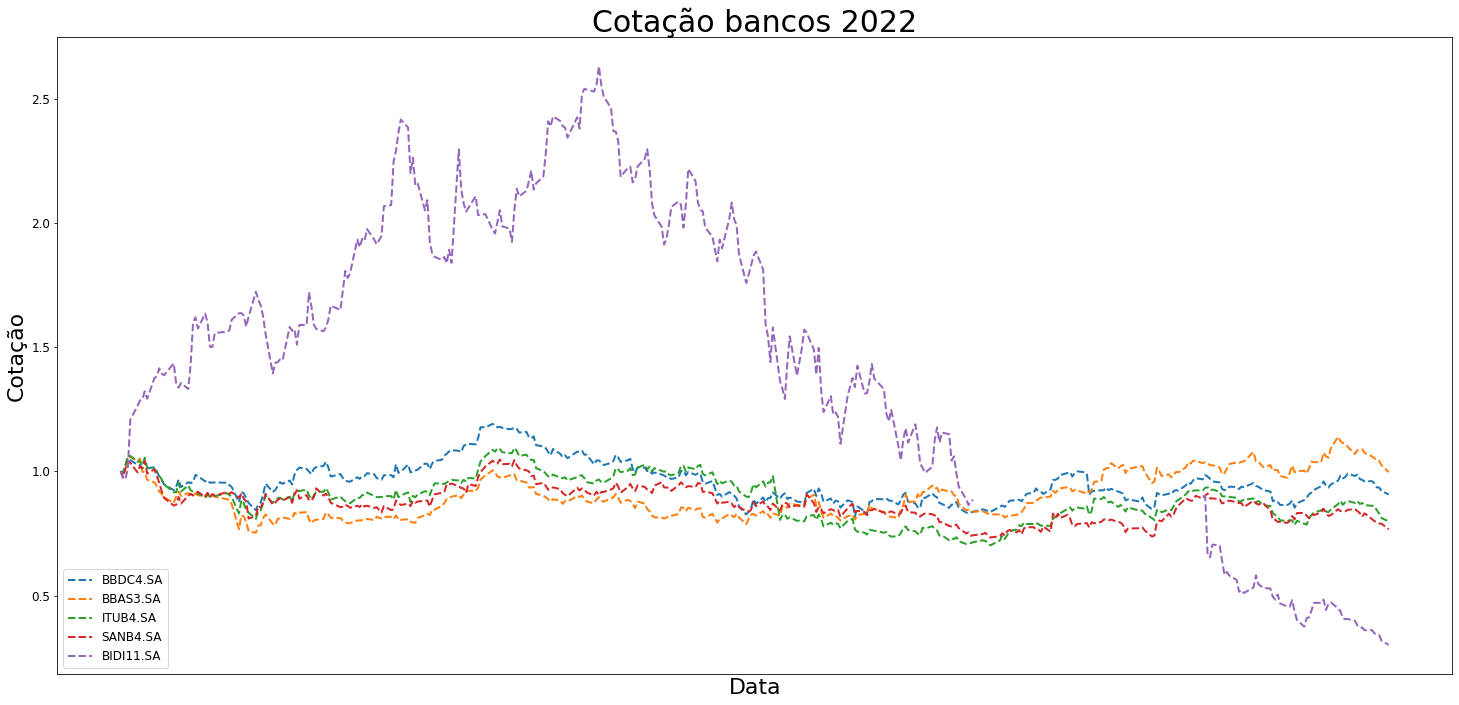

In [10]:
(mydata / mydata.iloc[0]).plot( figsize = (25,13),
                                     ls = "--",          # Formarto da linha. 
                                     lw = "2")           # Tamanho da linha. 
                                                           
plt.legend(loc = "lower left", fontsize = "12" )                          # Para desloca para a esquerda. 
plt.title ("Cotação bancos 2022", color = "black", fontsize = "30")        # Titulo da planilha.
plt.ylabel ("Cotação", fontsize = "22")                                    # Nome lateral.                         
plt.xlabel("Data", fontsize = "22" )                                       # Nome inferior. 
plt.yticks (fontsize = "12")
plt.xticks ([])

plt.show()

In [18]:
tempo_inicial = time.time()

tickers = [ "BRL=X", "TRY=X", "ZAR=X", "MXN=X", "RUB=x"]
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source = 'yahoo', start = '2022') ['Adj Close']  #Adj Close é a coluna
print (mydata.head())
print (mydata.tail())

               BRL=X    TRY=X     ZAR=X      MXN=X      RUB=x
Date                                                         
2022-01-03  5.569300  13.3566  15.92990  20.481600  74.986000
2022-01-04  5.681200  13.0617  15.86150  20.486000  74.371803
2022-01-05  5.676200  13.4115  15.99912  20.521999  75.263000
2022-01-06  5.705635  13.6880  15.85063  20.563700  76.661598
2022-01-07  5.682400  13.7821  15.69730  20.493099  76.353699
               BRL=X      TRY=X      ZAR=X      MXN=X      RUB=x
Date                                                            
2022-06-06  4.794200  16.594330  15.421700  19.555300  61.340000
2022-06-07  4.867526  16.837099  15.364280  19.576700  62.464901
2022-06-08  4.898100  17.176991  15.277600  19.587099  59.965099
2022-06-09  4.903300  17.239599  15.474500  19.676300  57.965000
2022-06-13  5.109700  17.245840  16.103001  20.465170  56.775002


In [19]:
bcr.bar_chart_race(mydata, fixed_max=True)


# sort='asc' (Set sort to 'asc' to change the order of the bars.)
#orientation='v' (By default, bars are horizontal, but can be made vertical with the orientation parameter.)
# fixed_max=True


C:\Users\55219\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\55219\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [7]:
tempo_final = time.time()
time_resultado = (tempo_final - tempo_inicial) / 60
time_resultado

0.4417436321576436

In [14]:
mydata.iloc[0]

BRL=X          5.569300
TRY=X         13.356600
ZAR=X         15.929900
MXN=X         20.481600
RUB=x         74.986000
BTC-USD    46458.117188
Name: 2022-01-03 00:00:00, dtype: float64

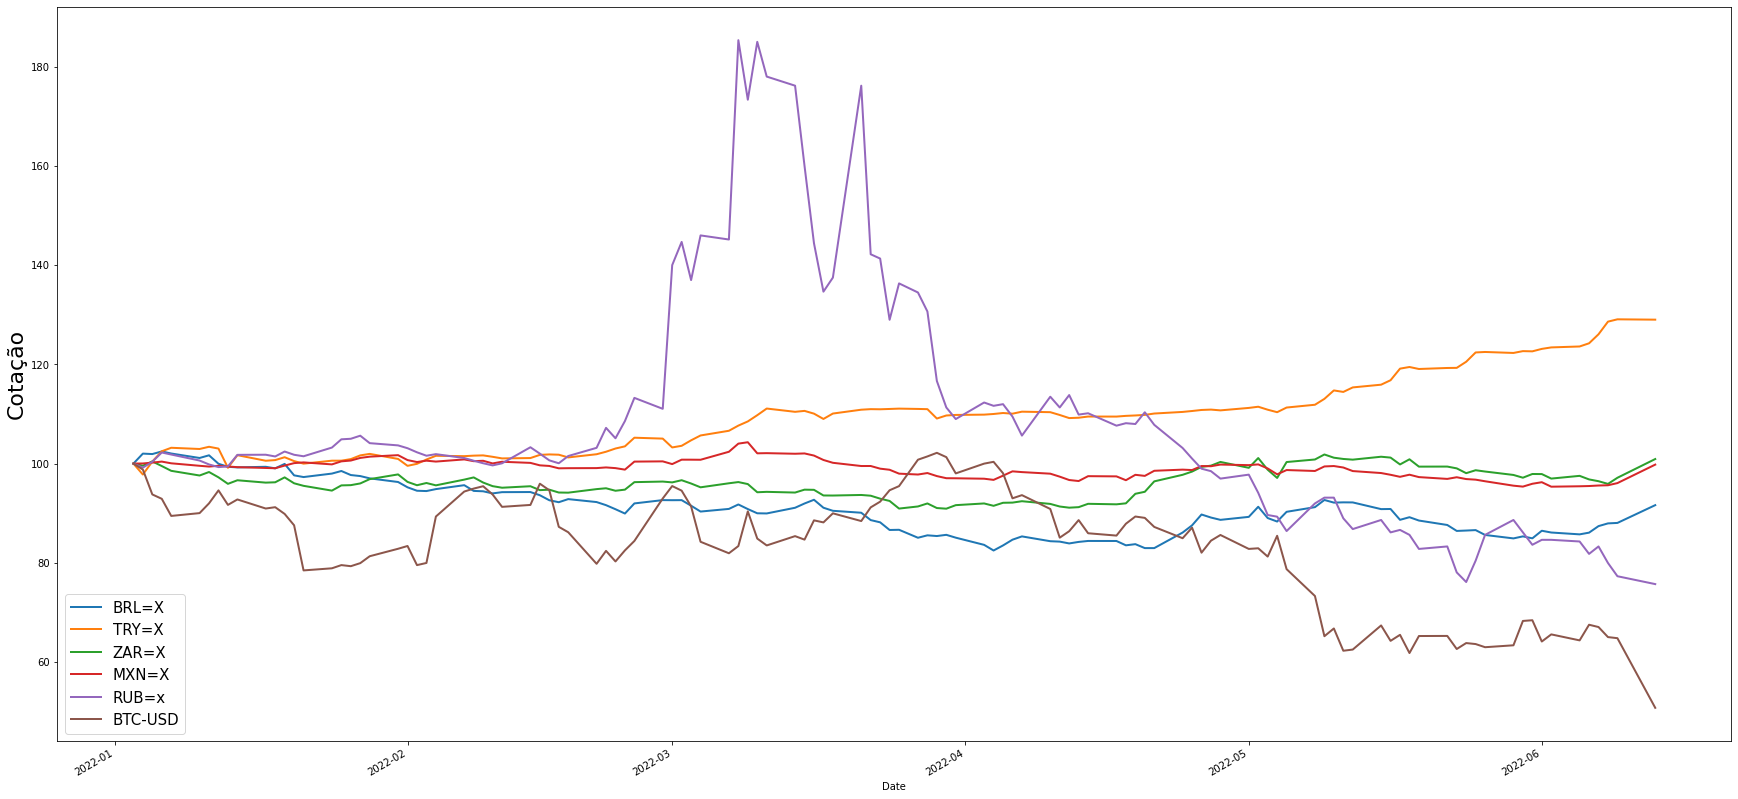

In [15]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (30, 15),
                                                lw = "2");
plt.ylabel ("Cotação", fontsize = "22");
plt.legend(loc = "lower left", fontsize = "15" ) 

plt.show()

In [25]:
dados = pd.read_csv('IMATDia_05-04-22.csv')    
dados.head(2)

,Código,Ação
0,BRAP4.SA,BRADESPAR
1,BRKM5.SA,BRASKEM


In [26]:
tickers = dados["Código"]
tickers.head(2)

0    BRAP4.SA
1    BRKM5.SA
Name: Código, dtype: object

In [27]:
tickers = dados["Código"]
inicio = dt.datetime(2022,6,7)
fim    = dt.datetime(2022,6,8)
lista = tickers
df = wb.DataReader (lista, "yahoo", inicio, fim) 
df

Attributes  Adj Close                                                 \
Symbols      BRAP4.SA   BRKM5.SA CBAV3.SA CMIN3.SA DXCO3.SA DEXP3.SA   
Date                                                                   
2022-06-07  30.520000  44.990002    15.90     5.13    10.97     8.84   
2022-06-08  29.790001  44.709999    14.58     5.04    10.76     8.54   

Attributes                                          ...   Volume           \
Symbols      FESA4.SA   GGBR4.SA GOAU4.SA RANI3.SA  ... GGBR4.SA GOAU4.SA   
Date                                                ...                     
2022-06-07  58.990002  30.389999    12.78     7.16  ...  8159600  4808800   
2022-06-08  57.549999  28.980000    12.30     6.95  ...  9221800  5150900   

Attributes                                                                   \
Symbols    RANI3.SA KLBN11.SA CSNA3.SA SUZB3.SA UNIP6.SA USIM3.SA  USIM5.SA   
Date                                                                          
2022-06-07   756600   3688200  7865500  3976000   217200   122000  19707200   
2022-06-08  1267500   3429200  7791500  2526500   159900   296000  13316200   

Attributes            
Symbols     VALE3.SA  
Date                  
2022-06-07  27004800  
2022-06-08  20334700  

[2 rows x 102 columns]

In [28]:
df['Close'] = df['Close'].pct_change()       # Calculando a variação diária da ação.
test = pd.DataFrame(df['Close'].round(4)*100)
test

Symbols,BRAP4.SA,BRKM5.SA,CBAV3.SA,CMIN3.SA,DXCO3.SA,DEXP3.SA,FESA4.SA,GGBR4.SA,GOAU4.SA,RANI3.SA,KLBN11.SA,CSNA3.SA,SUZB3.SA,UNIP6.SA,USIM3.SA,USIM5.SA,VALE3.SA
Date,,,,,,,,,,,,,,,,,
2022-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-08,-2.39,-0.62,-8.3,-1.75,-1.91,-3.39,-2.44,-4.64,-3.76,-2.93,-1.53,-4.93,-3.46,-0.52,-1.88,-3.06,-3.77


In [29]:
test.to_excel('variacao_imob.xlsx')

(array([18628., 18687., 18748., 18809., 18871., 18932., 18993., 19052.,
        19113., 19174.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

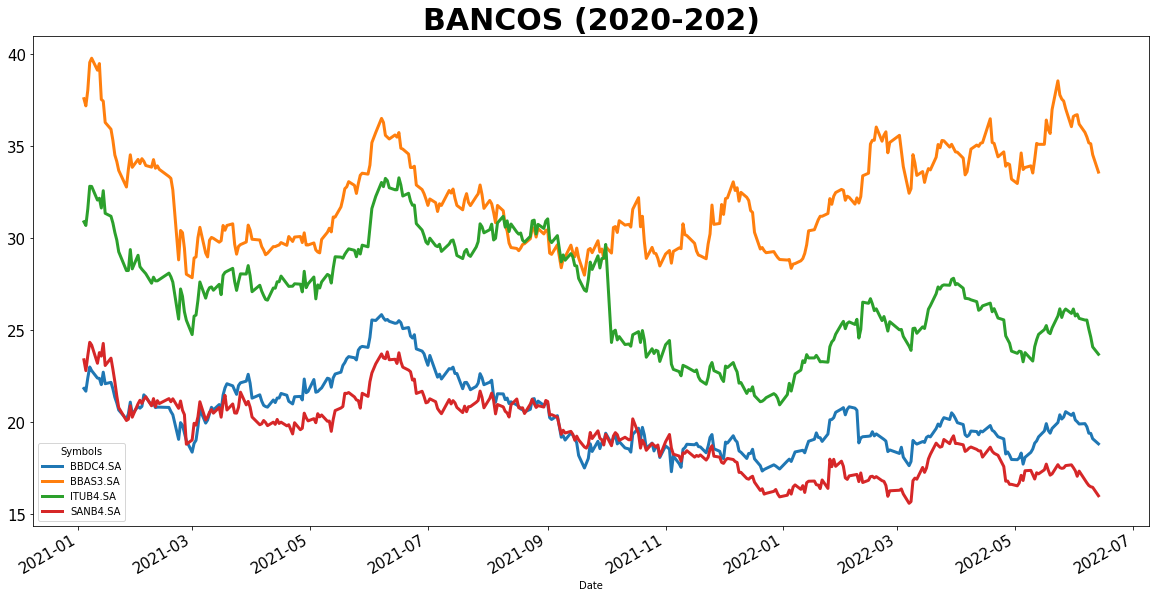

In [16]:
inicio = dt.datetime(2021,1,1)
fim    = dt.datetime(2022,6,13)
lista  = ["BBDC4.SA", "BBAS3.SA","ITUB4.SA","SANB4.SA"]
df     = wb.DataReader (lista, "yahoo", inicio, fim)
df["Close"].plot( 
                 lw = 3, 
                 figsize = (20, 10)
                 )
                                           
fig.title("BANCOS (2020-202)", fontsize = 30, weight = "bold")
fig.yticks (fontsize = 15)
plt.xticks (fontsize = 15)

In [17]:
test = df["Close"]
test

Symbols,BBDC4.SA,BBAS3.SA,ITUB4.SA,SANB4.SA
Date,,,,
2021-01-04,21.842976,37.590000,30.900000,23.400000
2021-01-05,21.694214,37.200001,30.700001,22.809999
2021-01-06,22.413223,38.049999,31.600000,23.629999
2021-01-07,23.008265,39.560001,32.830002,24.350000
2021-01-08,22.809917,39.790001,32.820000,24.200001
...,...,...,...,...
2022-06-07,19.760000,35.509998,25.559999,16.709999
2022-06-08,19.410000,35.189999,25.070000,16.570000
2022-06-09,19.400000,35.139999,24.639999,16.500000


In [ ]:
###############################################################################################################################


In [54]:
dados = pd.read_csv('AGFSDia_08-06-22.csv')   

tickers = dados["tickers"]

data_inicial = dt.datetime(2022,6,9)
data_final   = dt.datetime(2022,6,10)

lista = tickers

df = wb.DataReader (lista, "yahoo", data_inicial, data_final) 
df["Close"].round(2)

df['Close'] = df['Close'].pct_change() 

test = df[['Close']].round(4)*100 


ibov = test.iloc[1 : 20].round(3)

ibov = pd.DataFrame (ibov)


ibov.sort_values([], inplace = True)
ibov

ibov.to_excel('AGF_cotação.xlsx')

In [58]:
data_inicial = dt.datetime(2022,5,9)
data_final   = dt.datetime(2022,6,10)

lista =  [ "IFNC.SA"]

df = wb.DataReader (lista, "yahoo", data_inicial, data_final) 
df["Close"].round(2)


Symbols,IFNC.SA
Date,
2022-06-10,9874.37
